In [1]:
import xarray as xr
import numpy as np
import os

from glob import glob

In [3]:
import matplotlib.pyplot as plt

In [4]:
#matplotlib notebook
plt.style.use('seaborn') # pretty matplotlib plots
plt.rcParams['figure.figsize'] = (12, 8)
SMALL_SIZE = 14
MEDIUM_SIZE = 18
BIGGER_SIZE = 20
plt.rcParams['text.usetex'] = False
#plt.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}'] #for \text command


plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [8]:
files=glob("../PhIRE/NEWA_data/*")
files

['../PhIRE/NEWA_data\\experiment_data',
 '../PhIRE/NEWA_data\\NEWA_test.npy',
 '../PhIRE/NEWA_data\\NEWA_test.tfrecord',
 '../PhIRE/NEWA_data\\NEWA_train.npy',
 '../PhIRE/NEWA_data\\NEWA_train.tfrecord',
 '../PhIRE/NEWA_data\\old',
 '../PhIRE/NEWA_data\\P-CE-2018-2018-12-17.nc',
 '../PhIRE/NEWA_data\\test_dummy']

In [6]:
vars_=['crs',
       'ABLAT_CYL',
       'ACCRE_CYL',
       'ALPHA',
       'HFX',
       'LH',
       'LU_INDEX',
       'PBLH',
       'PD',
       'PRECIP',
       'PSFC',
       'Q2',
       'QVAPOR',
       'RHO',
       'RMOL',
       'SEAICE',
       'SWDDIR',
       'SWDDNI',
       'T',
       'T2',
       'TKE',
       'TSK',
       'UST',
       "WS",
       "WD",
       'WD10',
       'WS10',
       'ZNT']


In [9]:
#CE
ds=xr.open_dataset(files[-2],drop_variables=vars_).isel(south_north=slice(2,412))
ds

<xarray.Dataset>
Dimensions:      (height: 7, south_north: 410, time: 48, west_east: 540)
Coordinates:
  * time         (time) datetime64[ns] 2018-12-17 ... 2018-12-17T23:30:00
  * height       (height) float32 50.0 75.0 100.0 150.0 200.0 250.0 500.0
  * south_north  (south_north) float32 -9.33e+05 -9.3e+05 ... 2.91e+05 2.94e+05
  * west_east    (west_east) float32 -9.12e+05 -9.09e+05 ... 7.02e+05 7.05e+05
    XLAT         (south_north, west_east) float32 ...
    XLON         (south_north, west_east) float32 ...
Data variables:
    Times        (time) |S19 ...
    HGT          (south_north, west_east) float32 ...
    LANDMASK     (south_north, west_east) float32 ...
Attributes: (12/115)
    TITLE:                           Timeseries of the New European Wind Atla...
    START_DATE:                      2018-12-12_00:00:00
    SIMULATION_START_DATE:           2018-12-12_00:00:00
    WEST-EAST_GRID_DIMENSION:        541
    SOUTH-NORTH_GRID_DIMENSION:      415
    BOTTOM-TOP_GRID_DIMENSION:       61
    ...                              ...
    CONST_RATIO_Rd_Rw:               0.622
    CONST_Cp_DRY_AIR:                1004.5
    CONST_GRAVITY:                   9.81
    INSTITUTION:                     The NEWA Consortium
    EXPERIMENT:                      Production Run
    Conventions:                     CF-1.6

In [10]:
static_LR=ds[["HGT","LANDMASK"]].coarsen(south_north=10,west_east=10).mean()
static_LR["LANDMASK"]=static_LR.LANDMASK.round()
static_LR=np.transpose(static_LR.to_array().values,(1, 2, 0))

static_HR=np.transpose(ds[["HGT","LANDMASK"]].to_array().values,(1, 2, 0))

mu_HR=np.mean(static_HR[:,:,0])
sig_HR=np.std(static_HR[:,:,0])

mu_LR=np.mean(static_LR[:,:,0])
sig_LR=np.std(static_LR[:,:,0])

#close ds
#ds.close()


([], [])

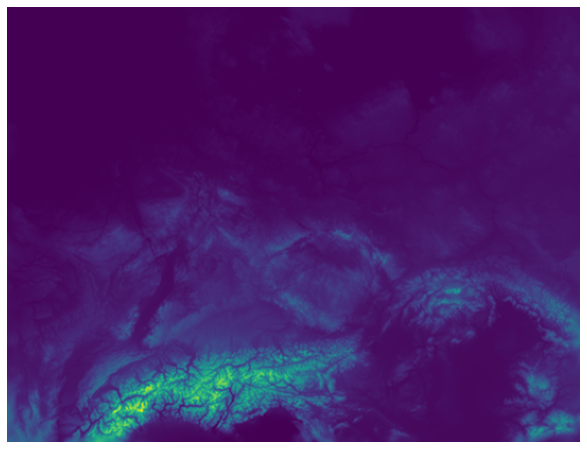

In [12]:
plt.imshow(ds.HGT.values, cmap='viridis', origin='lower')
plt.grid()
plt.xticks([])
plt.yticks([])

([], [])

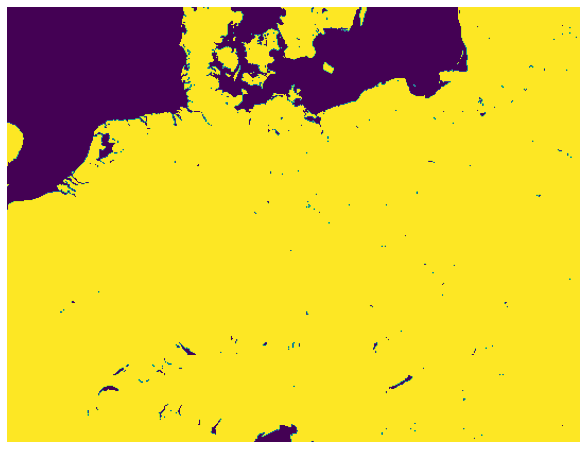

In [14]:
plt.imshow(ds.LANDMASK.values, cmap='viridis', origin='lower')
plt.grid()
plt.xticks([])
plt.yticks([])

In [27]:
#GB
ds=xr.open_dataset(files[-1],drop_variables=vars_).isel(west_east=slice(3,393))
ds

<xarray.Dataset>
Dimensions:      (height: 7, south_north: 540, time: 48, west_east: 390)
Coordinates:
  * time         (time) datetime64[ns] 2018-12-17 ... 2018-12-17T23:30:00
  * height       (height) float32 50.0 75.0 100.0 150.0 200.0 250.0 500.0
  * south_north  (south_north) float32 -4.26e+05 -4.23e+05 ... 1.191e+06
  * west_east    (west_east) float32 -1.875e+06 -1.872e+06 ... -7.08e+05
    XLAT         (south_north, west_east) float32 ...
    XLON         (south_north, west_east) float32 ...
Data variables:
    Times        (time) |S19 ...
    HGT          (south_north, west_east) float32 ...
    LANDMASK     (south_north, west_east) float32 ...
Attributes: (12/115)
    TITLE:                           Timeseries of the New European Wind Atla...
    START_DATE:                      2018-12-12_00:00:00
    SIMULATION_START_DATE:           2018-12-12_00:00:00
    WEST-EAST_GRID_DIMENSION:        397
    SOUTH-NORTH_GRID_DIMENSION:      541
    BOTTOM-TOP_GRID_DIMENSION:       61
    ...                              ...
    CONST_RATIO_Rd_Rw:               0.622
    CONST_Cp_DRY_AIR:                1004.5
    CONST_GRAVITY:                   9.81
    INSTITUTION:                     The NEWA Consortium
    EXPERIMENT:                      Production Run
    Conventions:                     CF-1.6

In [29]:

static_LR=ds[["HGT","LANDMASK"]].coarsen(south_north=10,west_east=10).mean()
static_LR["LANDMASK"]=static_LR.LANDMASK.round()
static_LR=np.transpose(static_LR.to_array().values,(1, 2, 0))

static_HR=np.transpose(ds[["HGT","LANDMASK"]].to_array().values,(1, 2, 0))

static_HR[:,:,0]=(static_HR[:,:,0]-mu_HR)/sig_HR

static_LR[:,:,0]=(static_LR[:,:,0]-mu_LR)/sig_LR


In [32]:

Dom="GB"
p2s="/".join(["//smb.uni-oldenburg.de/hpc_data/thesis/data/static",Dom])
if not os.path.exists(p2s):
    os.makedirs(p2s)
np.save("/".join([p2s,"LR.npy"]), static_LR)
np.save("/".join([p2s,"HR.npy"]), static_HR)


In [18]:
p2s

'//smb.uni-oldenburg.de/hpc_data/thesis/data/static/GB'

In [1]:
import numpy as np

In [4]:
arr=np.load('//smb.uni-oldenburg.de/hpc_data/thesis/data/static/GB/HR.npy')

In [36]:
np.mean(arr,axis=(0,1))

array([5.3193689e-05, 1.9031814e-01], dtype=float32)

In [35]:
np.mean(static_HR,axis=(0,1))

array([-0.6234009 ,  0.19031814], dtype=float32)

In [47]:
m=np.mean(np.concatenate([np.expand_dims(static_HR,0),np.expand_dims(static_HR,0)],axis=0),axis=(1,2,3))

In [50]:
np.concatenate([m,m,m])

array([-0.21654141, -0.21654141, -0.21654141, -0.21654141, -0.21654141,
       -0.21654141], dtype=float32)